In [45]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as func
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType, LongType

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
csv = spark.read.csv('CourseFiles/Latest_Data_Science_Salaries.csv', header = True, inferSchema = True)

In [4]:
csv.createOrReplaceTempView("DataScienceSalaries")

__Average Salaries for Senior Data Engineer Per Country in 2023__

In [8]:
csv.select('Job Title', 'Employment Type', 'Year', 'Company Location', 'Salary in USD')\
.filter(csv['Job Title'] == 'Data Engineer')\
.filter(csv.Year == '2023')\
.filter(csv['Experience Level'] == 'Senior')\
.groupBy(csv['Company Location'])\
.agg(func.round(func.mean(csv['Salary in USD']),2).alias('Average USD Salaries'))\
.orderBy(func.desc('Average USD Salaries'))\
.withColumnRenamed('Company Location', 'Country')\
.show()

+--------------+--------------------+
|       Country|Average USD Salaries|
+--------------+--------------------+
| United States|           168786.66|
|       Germany|            141479.0|
|United Kingdom|            129320.0|
|        Canada|            127500.0|
|       Ireland|            102569.0|
|        Sweden|             86374.0|
|      Colombia|             66000.0|
|     Argentina|             65000.0|
|      Portugal|             53983.5|
|       Estonia|             50529.0|
+--------------+--------------------+



__Average Salaries per Job Title in the United States in 2023__

In [17]:
csv.filter(csv['Year'] == '2023').filter(csv['Company Location'] == 'United States')\
.groupBy(csv['Job Title']).agg(func.round(func.mean(csv['Salary in USD']),2).alias('Average Salaries'))\
.orderBy(func.desc('Average Salaries')).show()

+--------------------+----------------+
|           Job Title|Average Salaries|
+--------------------+----------------+
|Finance Data Analyst|        323905.0|
|Head of Data Science|        267475.0|
|  AWS Data Architect|        258000.0|
|Director of Data ...|        249100.0|
|        Head of Data|        247160.0|
|        AI Architect|        237484.0|
|Computer Vision E...|       212036.36|
|Software Data Eng...|        210000.0|
|   Data Science Lead|       207666.67|
|         ML Engineer|       204251.97|
|Data Operations E...|        202842.5|
|Machine Learning ...|        200500.0|
|        AI Developer|        200000.0|
|        NLP Engineer|       198333.33|
|Data Science Manager|       197430.05|
|Machine Learning ...|       195810.97|
|Machine Learning ...|       189842.86|
|Deep Learning Eng...|       189236.67|
|Machine Learning ...|        188760.0|
|   Research Engineer|       186146.68|
+--------------------+----------------+
only showing top 20 rows



Average

In [60]:
csv.select('Job Title', 'Year', 'Salary in USD')\
.filter(csv['Job Title'] == 'Data Engineer')\
.filter(csv['Company Location'] == 'United States')\
.groupBy('Year').agg(func.round(func.max('Salary in USD'),2).alias('Average Salaries'))\
.orderBy(func.asc('Year'))\
.show()

+----+----------------+
|Year|Average Salaries|
+----+----------------+
|2020|          188000|
|2021|          200000|
|2022|          324000|
|2023|          333500|
+----+----------------+



In [145]:
df = csv.toPandas()

In [147]:
df = df[['Job Title', 'Salary in USD', 'Year']]\
.where(df['Job Title'] == 'Data Engineer')\
.where(df['Employment Type'] == 'Full-Time')\
.groupby('Year').mean('Salary in USD').reset_index()

In [148]:
df['Salary in USD'] = df['Salary in USD'].astype(int)

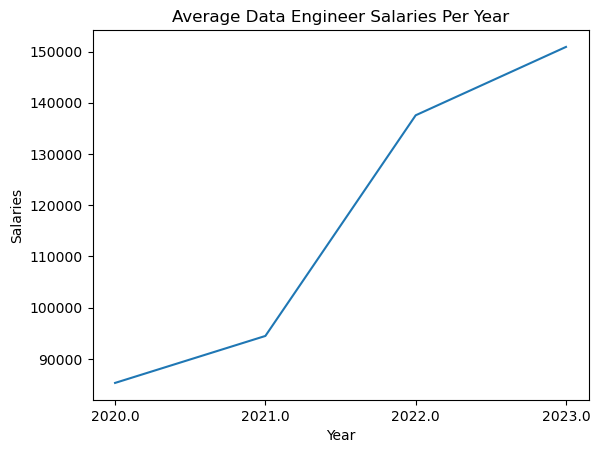

In [151]:
x = sns.lineplot(df, x = df['Year'].astype('str'), y = 'Salary in USD')
plt.title('Average Data Engineer Salaries Per Year')
plt.ylabel('Salaries')
plt.show()